In [323]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [324]:
res_non_complete = pd.read_csv("./results_non_complete.csv")

In [325]:
res_nC_2_50 = res_non_complete.iloc[:49]
res_nC_51_200 = res_non_complete.iloc[50:199]
res_nC_201_600 = res_non_complete.iloc[200:599]

# Lineplots for Non Complete Bipartite Graphs
## From 2 up to 50 vertices per part

In [326]:
df = res_nC_2_50
title_vertices = " for 2 - 50 vertices"
x = df['Edges_per_part']

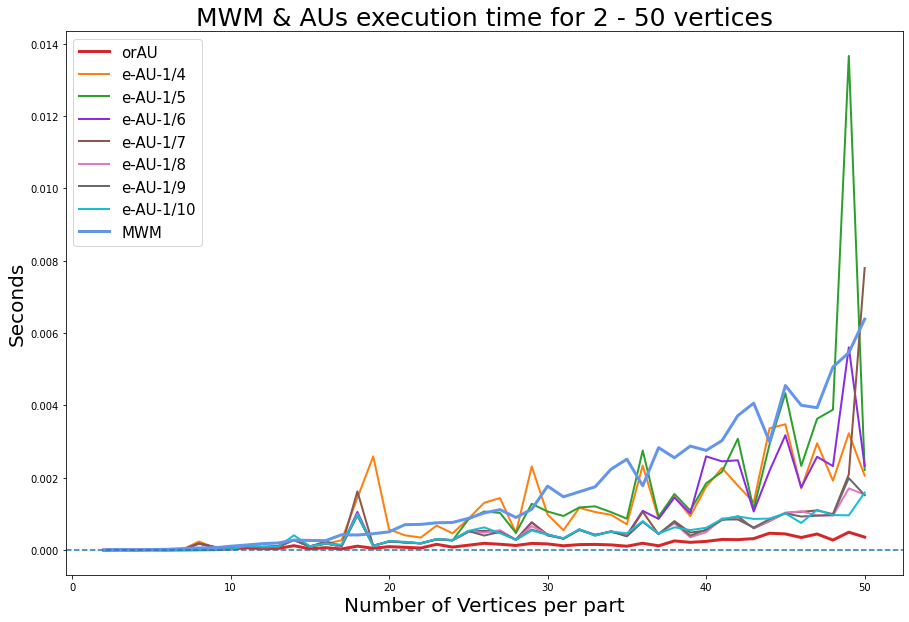

In [327]:
plt.figure(figsize=(15,10))

plt.plot(x,df['Seconds_orAU'], label='orAU', color='tab:red', linewidth=3)
plt.plot(x,df['Seconds_eAU_4'], label='e-AU-1/4', color='tab:orange', linewidth=2)
plt.plot(x,df['Seconds_eAU_5'], label='e-AU-1/5', color='tab:green', linewidth=2)
plt.plot(x,df['Seconds_eAU_6'], label='e-AU-1/6', color='blueviolet', linewidth=2)
plt.plot(x,df['Seconds_eAU_7'], label='e-AU-1/7', color='tab:brown', linewidth=2)
plt.plot(x,df['Seconds_eAU_8'], label='e-AU-1/8', color='tab:pink', linewidth=2)
plt.plot(x,df['Seconds_eAU_9'], label='e-AU-1/9', color='dimgray', linewidth=2)
plt.plot(x,df['Seconds_eAU_10'], label='e-AU-1/10', color='tab:cyan', linewidth=2)
plt.plot(x,df['Seconds_MWM'], label='MWM', color='cornflowerblue', linewidth=3)
plt.axhline(y=0, linestyle='dashed')

plt.legend(loc=2, prop={'size': 15})

plt.ylabel('Seconds', fontsize=20)
plt.xlabel('Number of Vertices per part', fontsize=20)
plt.title('MWM & AUs execution time' + title_vertices, fontsize=25)

plt.show()

In [328]:
n = pd.DataFrame(df)
new_col_cost_mwm = np.zeros((8,49))
for i, j in df.iterrows():
  if(j.Total_Cost_MWM == -1):
    new_col_cost_mwm[0][i] = df['Total_Cost_orAU'][i] * (100 / 101)
    for a in range(1,len(new_col_cost_mwm) - 1):
      new_col_cost_mwm[a][i] = (df['Total_Cost_eAU_' + str(a + 4)][i] * (100 / 101))
  else:
    for a in range(len(new_col_cost_mwm)):
      new_col_cost_mwm[a][i] = df['Total_Cost_MWM'][i]
n['new_mwm_cost_orAU'] = new_col_cost_mwm[0]
for a in range(1,len(new_col_cost_mwm)):
  n['new_mwm_cost_' + str(a + 3)] = new_col_cost_mwm[a]

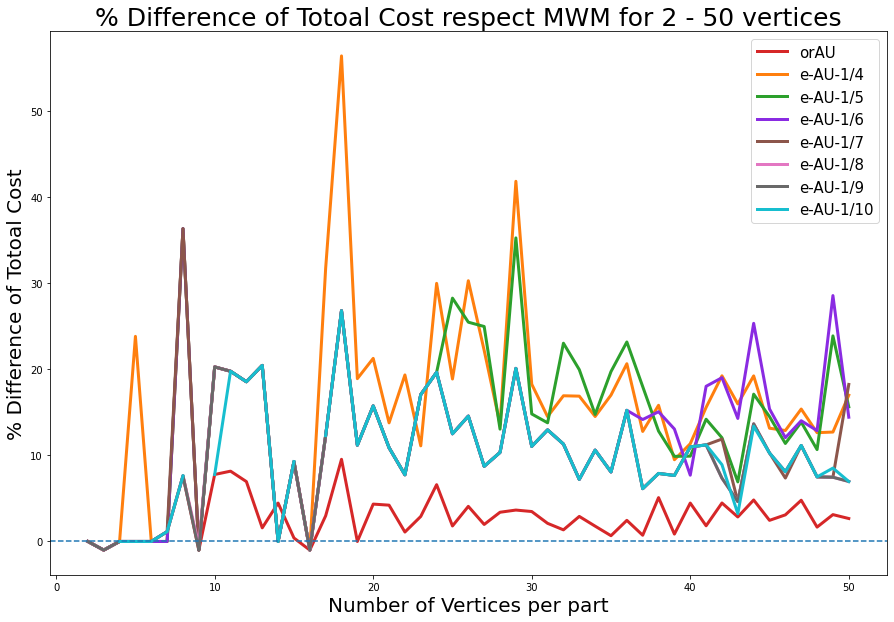

In [329]:
plt.figure(figsize=(15,10))

plt.plot(x,(100 - ((100 * n['Total_Cost_orAU']) / n['new_mwm_cost_orAU'])), label='orAU', color='tab:red', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_4']) / n['new_mwm_cost_4'])), label='e-AU-1/4', color='tab:orange', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_5']) / n['new_mwm_cost_5'])), label='e-AU-1/5', color='tab:green', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_6']) / n['new_mwm_cost_6'])), label='e-AU-1/6', color='blueviolet', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_7']) / n['new_mwm_cost_7'])), label='e-AU-1/7', color='tab:brown', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_8']) / n['new_mwm_cost_8'])), label='e-AU-1/8', color='tab:pink', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_9']) / n['new_mwm_cost_9'])), label='e-AU-1/9', color='dimgray', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_10']) / n['new_mwm_cost_10'])), label='e-AU-1/10', color='tab:cyan', linewidth=3)
plt.axhline(y=0, linestyle='dashed')

plt.legend(loc=1, prop={'size': 15})

plt.ylabel('% Difference of Totoal Cost', fontsize=20)
plt.xlabel('Number of Vertices per part', fontsize=20)
plt.title('% Difference of Totoal Cost respect MWM' + title_vertices, fontsize=25)

plt.show()

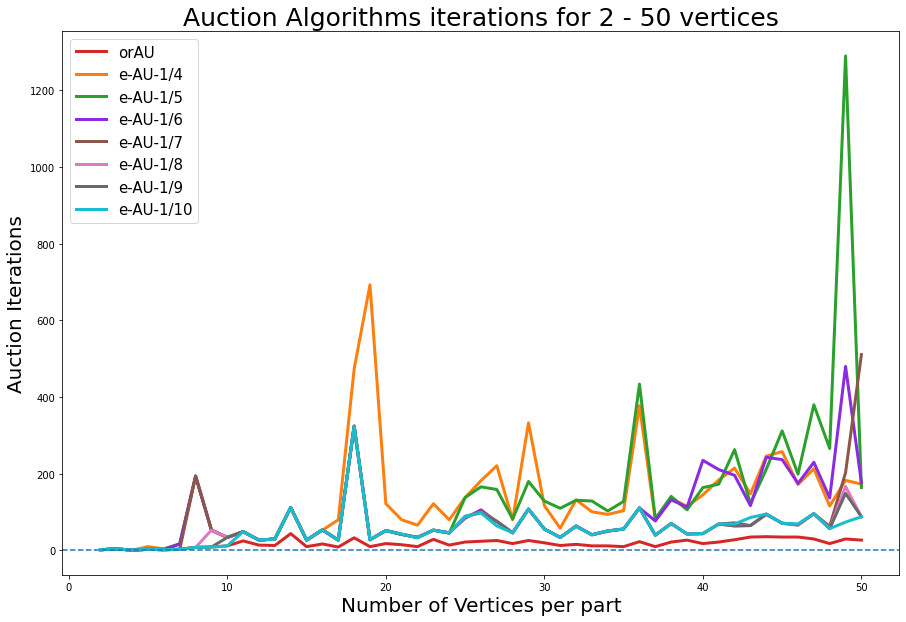

In [330]:
plt.figure(figsize=(15,10))

plt.plot(x,df['Iterations_orAU'], label='orAU', color='tab:red', linewidth=3)
plt.plot(x,df['Iterations_eAU_4'], label='e-AU-1/4', color='tab:orange', linewidth=3)
plt.plot(x,df['Iterations_eAU_5'], label='e-AU-1/5', color='tab:green', linewidth=3)
plt.plot(x,df['Iterations_eAU_6'], label='e-AU-1/6', color='blueviolet', linewidth=3)
plt.plot(x,df['Iterations_eAU_7'], label='e-AU-1/7', color='tab:brown', linewidth=3)
plt.plot(x,df['Iterations_eAU_8'], label='e-AU-1/8', color='tab:pink', linewidth=3)
plt.plot(x,df['Iterations_eAU_9'], label='e-AU-1/9', color='dimgray', linewidth=3)
plt.plot(x,df['Iterations_eAU_10'], label='e-AU-1/10', color='tab:cyan', linewidth=3)
plt.axhline(y=0, linestyle='dashed')

plt.legend(loc=2, prop={'size': 15})

plt.ylabel('Auction Iterations', fontsize=20)
plt.xlabel('Number of Vertices per part', fontsize=20)
plt.title('Auction Algorithms iterations' + title_vertices, fontsize=25)

plt.show()

In [331]:
print('Number of failed execution for MWM: ' + str(len(df[df['Total_Cost_MWM'] == -1])))
print('Number of failed execution for eAU_4: ' + str(len(df[df['Total_Cost_eAU_4'] == -1])))
print('Number of failed execution for eAU_5: ' + str(len(df[df['Total_Cost_eAU_5'] == -1])))
print('Number of failed execution for eAU_6: ' + str(len(df[df['Total_Cost_eAU_6'] == -1])))
print('Number of failed execution for eAU_7: ' + str(len(df[df['Total_Cost_eAU_7'] == -1])))
print('Number of failed execution for eAU_8: ' + str(len(df[df['Total_Cost_eAU_8'] == -1])))
print('Number of failed execution for eAU_9: ' + str(len(df[df['Total_Cost_eAU_9'] == -1])))
print('Number of failed execution for eAU_10: ' + str(len(df[df['Total_Cost_eAU_10'] == -1])))

Number of failed execution for MWM: 3
Number of failed execution for eAU_4: 0
Number of failed execution for eAU_5: 0
Number of failed execution for eAU_6: 0
Number of failed execution for eAU_7: 0
Number of failed execution for eAU_8: 0
Number of failed execution for eAU_9: 0
Number of failed execution for eAU_10: 0


In [332]:
print(df["Auction_Winner"].value_counts(normalize=False))
print('\n')
print(df["Winner_Execution_Time"].value_counts(normalize=False))
print('\n')
print(df["Winner_Total_Cost"].value_counts(normalize=False))

auction_original           45
auction_e_scaling_0.143     2
auction_e_scaling_0.200     1
auction_e_scaling_0.100     1
Name: Auction_Winner, dtype: int64


AU     48
MWM     1
Name: Winner_Execution_Time, dtype: int64


MWM     39
None     7
AU       3
Name: Winner_Total_Cost, dtype: int64


## From 51 up to 200 vertices per part

In [333]:
df = res_nC_51_200
title_vertices = " for 51 - 200 vertices"
x = df['Edges_per_part']

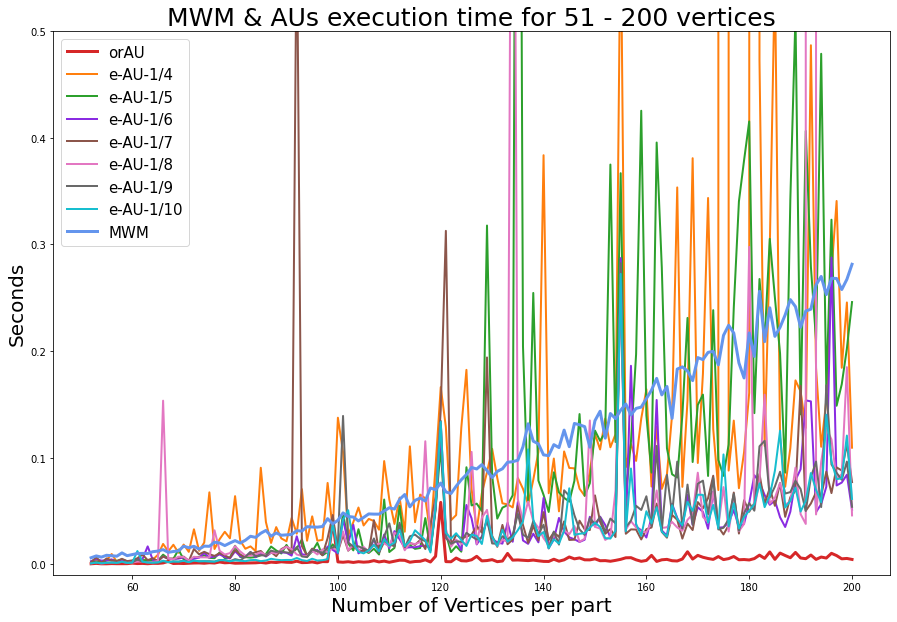

In [334]:
plt.figure(figsize=(15,10))

plt.plot(x,df['Seconds_orAU'], label='orAU', color='tab:red', linewidth=3)
plt.plot(x,df['Seconds_eAU_4'], label='e-AU-1/4', color='tab:orange', linewidth=2)
plt.plot(x,df['Seconds_eAU_5'], label='e-AU-1/5', color='tab:green', linewidth=2)
plt.plot(x,df['Seconds_eAU_6'], label='e-AU-1/6', color='blueviolet', linewidth=2)
plt.plot(x,df['Seconds_eAU_7'], label='e-AU-1/7', color='tab:brown', linewidth=2)
plt.plot(x,df['Seconds_eAU_8'], label='e-AU-1/8', color='tab:pink', linewidth=2)
plt.plot(x,df['Seconds_eAU_9'], label='e-AU-1/9', color='dimgray', linewidth=2)
plt.plot(x,df['Seconds_eAU_10'], label='e-AU-1/10', color='tab:cyan', linewidth=2)
plt.plot(x,df['Seconds_MWM'], label='MWM', color='cornflowerblue', linewidth=3)

plt.legend(loc=2, prop={'size': 15})

plt.ylim(-0.01,0.5)

plt.ylabel('Seconds', fontsize=20)
plt.xlabel('Number of Vertices per part', fontsize=20)
plt.title('MWM & AUs execution time' + title_vertices, fontsize=25)

plt.show()

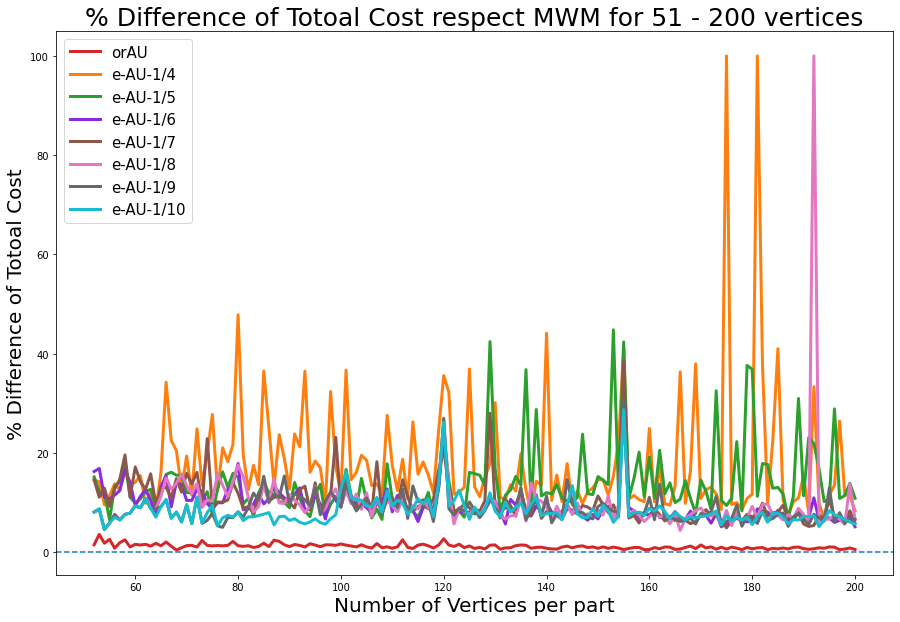

In [335]:
plt.figure(figsize=(15,10))

plt.plot(x,(100 - ((100 * df['Total_Cost_orAU']) / df['Total_Cost_MWM'])), label='orAU', color='tab:red', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_4']) / df['Total_Cost_MWM'])), label='e-AU-1/4', color='tab:orange', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_5']) / df['Total_Cost_MWM'])), label='e-AU-1/5', color='tab:green', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_6']) / df['Total_Cost_MWM'])), label='e-AU-1/6', color='blueviolet', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_7']) / df['Total_Cost_MWM'])), label='e-AU-1/7', color='tab:brown', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_8']) / df['Total_Cost_MWM'])), label='e-AU-1/8', color='tab:pink', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_9']) / df['Total_Cost_MWM'])), label='e-AU-1/9', color='dimgray', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_10']) / df['Total_Cost_MWM'])), label='e-AU-1/10', color='tab:cyan', linewidth=3)
plt.axhline(y=0, linestyle='dashed')

plt.legend(loc=2, prop={'size': 15})

plt.ylabel('% Difference of Totoal Cost', fontsize=20)
plt.xlabel('Number of Vertices per part', fontsize=20)
plt.title('% Difference of Totoal Cost respect MWM' + title_vertices, fontsize=25)

plt.show()

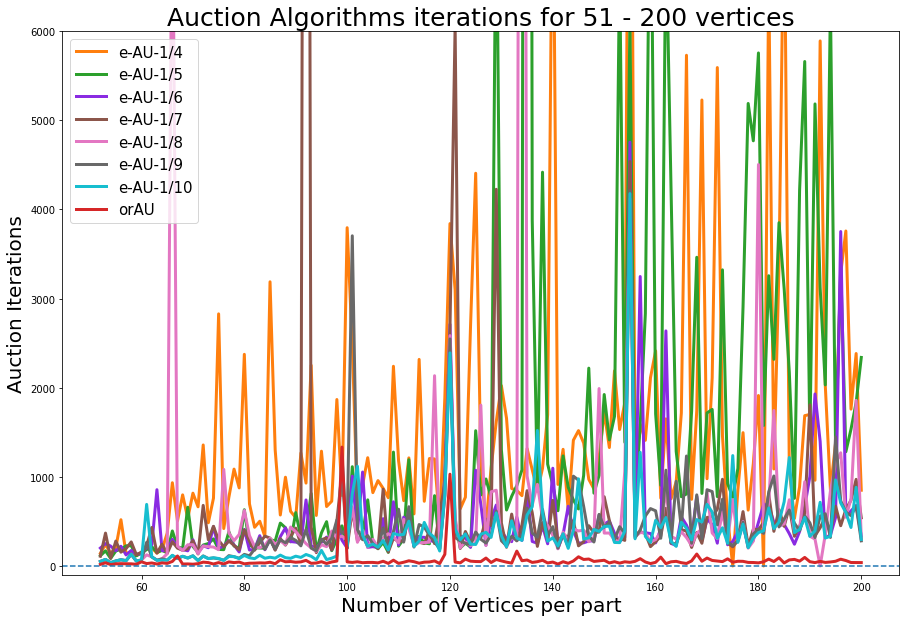

In [336]:
plt.figure(figsize=(15,10))

plt.plot(x,df['Iterations_eAU_4'], label='e-AU-1/4', color='tab:orange', linewidth=3)
plt.plot(x,df['Iterations_eAU_5'], label='e-AU-1/5', color='tab:green', linewidth=3)
plt.plot(x,df['Iterations_eAU_6'], label='e-AU-1/6', color='blueviolet', linewidth=3)
plt.plot(x,df['Iterations_eAU_7'], label='e-AU-1/7', color='tab:brown', linewidth=3)
plt.plot(x,df['Iterations_eAU_8'], label='e-AU-1/8', color='tab:pink', linewidth=3)
plt.plot(x,df['Iterations_eAU_9'], label='e-AU-1/9', color='dimgray', linewidth=3)
plt.plot(x,df['Iterations_eAU_10'], label='e-AU-1/10', color='tab:cyan', linewidth=3)
plt.plot(x,df['Iterations_orAU'], label='orAU', color='tab:red', linewidth=3)
plt.axhline(y=0, linestyle='dashed')

plt.ylim(-100,6000)

plt.legend(loc=2, prop={'size': 15})

plt.ylabel('Auction Iterations', fontsize=20)
plt.xlabel('Number of Vertices per part', fontsize=20)
plt.title('Auction Algorithms iterations' + title_vertices, fontsize=25)

plt.show()

In [337]:
print('Number of failed execution for MWM: ' + str(len(df[df['Total_Cost_MWM'] == -1])))
print('Number of failed execution for eAU_4: ' + str(len(df[df['Total_Cost_eAU_4'] == -1])))
print('Number of failed execution for eAU_5: ' + str(len(df[df['Total_Cost_eAU_5'] == -1])))
print('Number of failed execution for eAU_6: ' + str(len(df[df['Total_Cost_eAU_6'] == -1])))
print('Number of failed execution for eAU_7: ' + str(len(df[df['Total_Cost_eAU_7'] == -1])))
print('Number of failed execution for eAU_8: ' + str(len(df[df['Total_Cost_eAU_8'] == -1])))
print('Number of failed execution for eAU_9: ' + str(len(df[df['Total_Cost_eAU_9'] == -1])))
print('Number of failed execution for eAU_10: ' + str(len(df[df['Total_Cost_eAU_10'] == -1])))

Number of failed execution for MWM: 0
Number of failed execution for eAU_4: 2
Number of failed execution for eAU_5: 0
Number of failed execution for eAU_6: 0
Number of failed execution for eAU_7: 0
Number of failed execution for eAU_8: 1
Number of failed execution for eAU_9: 0
Number of failed execution for eAU_10: 0


In [338]:
print(df["Auction_Winner"].value_counts(normalize=False))
print('\n')
print(df["Winner_Execution_Time"].value_counts(normalize=False))
print('\n')
print(df["Winner_Total_Cost"].value_counts(normalize=False))

auction_original    149
Name: Auction_Winner, dtype: int64


AU     148
MWM      1
Name: Winner_Execution_Time, dtype: int64


MWM    149
Name: Winner_Total_Cost, dtype: int64


## From 201 up to 600 vertices per part

In [339]:
df = res_nC_201_600
title_vertices = " for 201 - 600 vertices"
x = df['Edges_per_part']

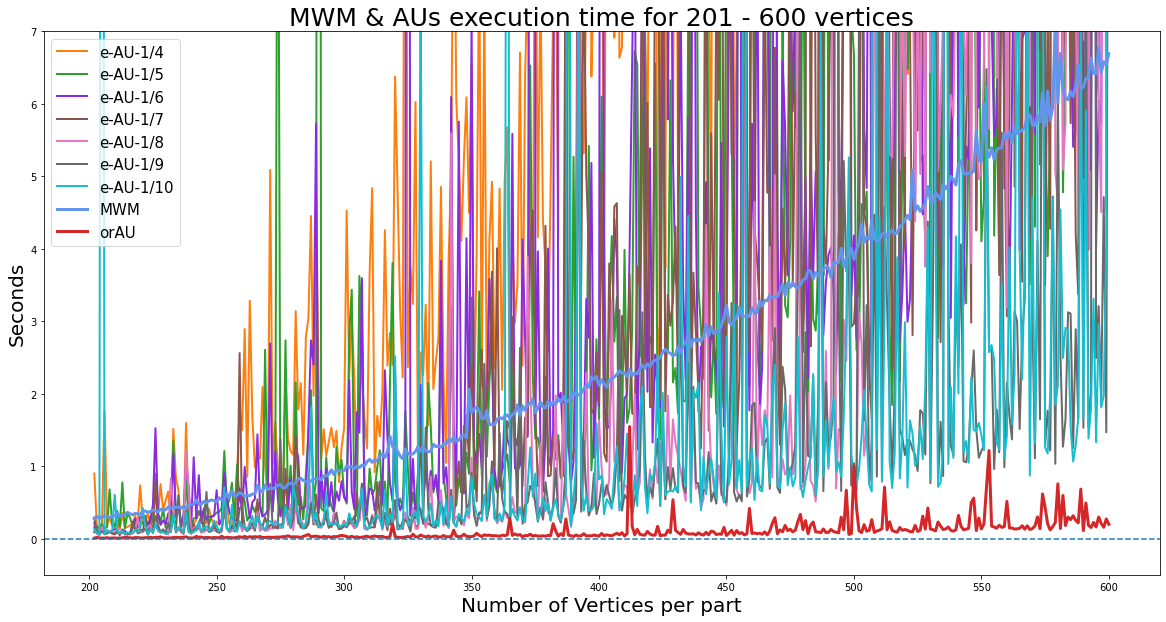

In [340]:
plt.figure(figsize=(20,10))

plt.plot(x,df['Seconds_eAU_4'], label='e-AU-1/4', color='tab:orange', linewidth=2)
plt.plot(x,df['Seconds_eAU_5'], label='e-AU-1/5', color='tab:green', linewidth=2)
plt.plot(x,df['Seconds_eAU_6'], label='e-AU-1/6', color='blueviolet', linewidth=2)
plt.plot(x,df['Seconds_eAU_7'], label='e-AU-1/7', color='tab:brown', linewidth=2)
plt.plot(x,df['Seconds_eAU_8'], label='e-AU-1/8', color='tab:pink', linewidth=2)
plt.plot(x,df['Seconds_eAU_9'], label='e-AU-1/9', color='dimgray', linewidth=2)
plt.plot(x,df['Seconds_eAU_10'], label='e-AU-1/10', color='tab:cyan', linewidth=2)
plt.plot(x,df['Seconds_MWM'], label='MWM', color='cornflowerblue', linewidth=3)
plt.plot(x,df['Seconds_orAU'], label='orAU', color='tab:red', linewidth=3)
plt.axhline(y=0, linestyle='dashed')
plt.ylim(-0.5,7)

plt.legend(loc=2, prop={'size': 15})

plt.ylabel('Seconds', fontsize=20)
plt.xlabel('Number of Vertices per part', fontsize=20)
plt.title('MWM & AUs execution time' + title_vertices, fontsize=25)

plt.show()

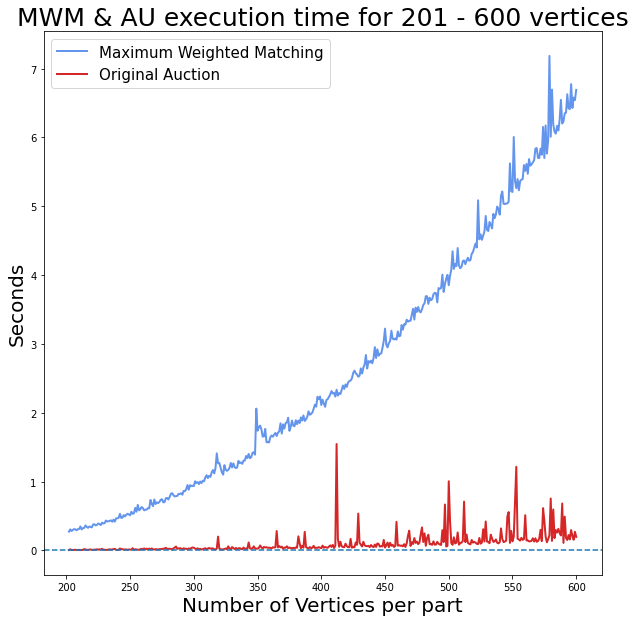

In [341]:
plt.figure(figsize=(10,10))

plt.plot(x,df['Seconds_MWM'], label='Maximum Weighted Matching', color='cornflowerblue', linewidth=2)
plt.plot(x,df['Seconds_orAU'], label='Original Auction', color='tab:red', linewidth=2)
plt.axhline(y=0, linestyle='dashed')


plt.legend(loc=2, prop={'size': 15})

plt.ylabel('Seconds', fontsize=20)
plt.xlabel('Number of Vertices per part', fontsize=20)
plt.title('MWM & AU execution time' + title_vertices, fontsize=25)

plt.show()

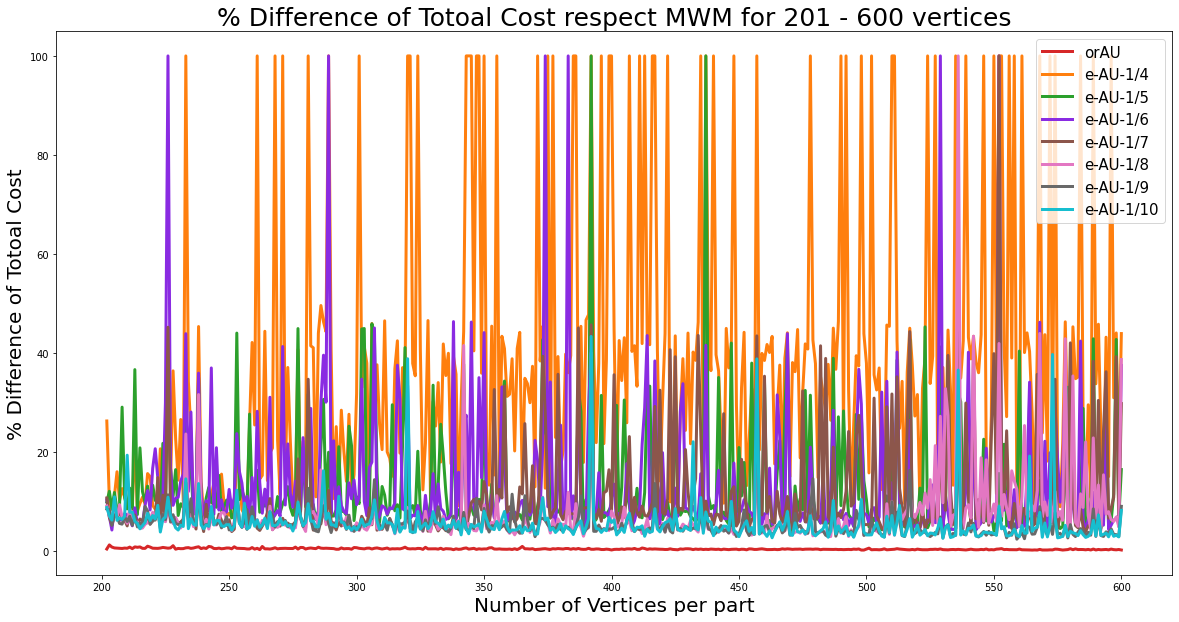

In [342]:
plt.figure(figsize=(20,10))

plt.plot(x,(100 - ((100 * df['Total_Cost_orAU']) / df['Total_Cost_MWM'])), label='orAU', color='tab:red', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_4']) / df['Total_Cost_MWM'])), label='e-AU-1/4', color='tab:orange', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_5']) / df['Total_Cost_MWM'])), label='e-AU-1/5', color='tab:green', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_6']) / df['Total_Cost_MWM'])), label='e-AU-1/6', color='blueviolet', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_7']) / df['Total_Cost_MWM'])), label='e-AU-1/7', color='tab:brown', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_8']) / df['Total_Cost_MWM'])), label='e-AU-1/8', color='tab:pink', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_9']) / df['Total_Cost_MWM'])), label='e-AU-1/9', color='dimgray', linewidth=3)
plt.plot(x,(100 - ((100 * df['Total_Cost_eAU_10']) / df['Total_Cost_MWM'])), label='e-AU-1/10', color='tab:cyan', linewidth=3)

plt.legend(loc=1, prop={'size': 15})

plt.ylabel('% Difference of Totoal Cost', fontsize=20)
plt.xlabel('Number of Vertices per part', fontsize=20)
plt.title('% Difference of Totoal Cost respect MWM' + title_vertices, fontsize=25)

plt.show()

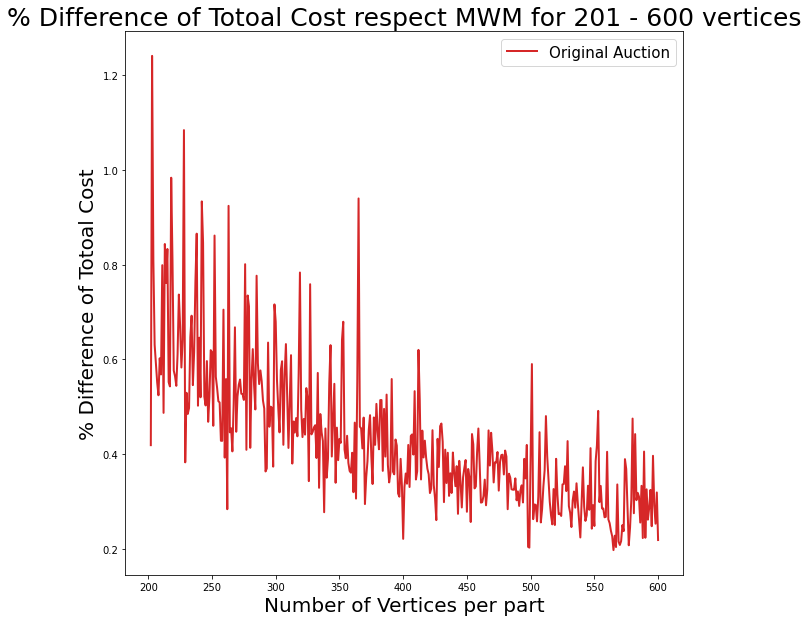

In [343]:
plt.figure(figsize=(10,10))

plt.plot(x,(100 - ((100 * df['Total_Cost_orAU']) / df['Total_Cost_MWM'])), label='Original Auction', color='tab:red', linewidth=2)

plt.legend(loc=1, prop={'size': 15})

plt.ylabel('% Difference of Totoal Cost', fontsize=20)
plt.xlabel('Number of Vertices per part', fontsize=20)
plt.title('% Difference of Totoal Cost respect MWM' + title_vertices, fontsize=25)

plt.show()

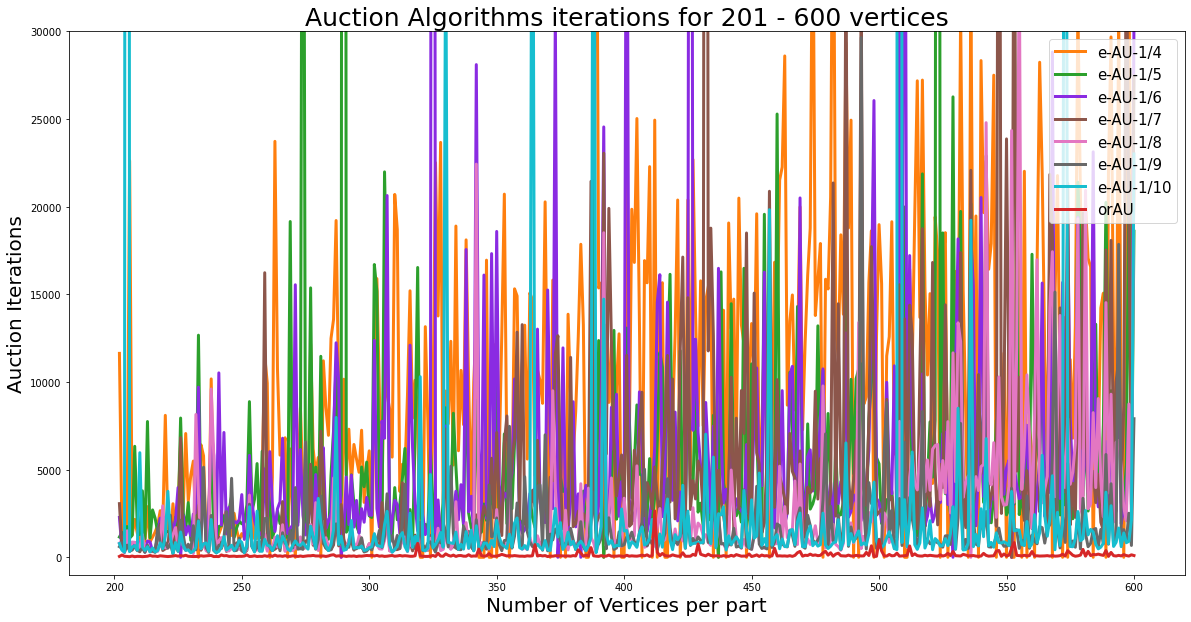

In [344]:
plt.figure(figsize=(20,10))

plt.plot(x,df['Iterations_eAU_4'], label='e-AU-1/4', color='tab:orange', linewidth=3)
plt.plot(x,df['Iterations_eAU_5'], label='e-AU-1/5', color='tab:green', linewidth=3)
plt.plot(x,df['Iterations_eAU_6'], label='e-AU-1/6', color='blueviolet', linewidth=3)
plt.plot(x,df['Iterations_eAU_7'], label='e-AU-1/7', color='tab:brown', linewidth=3)
plt.plot(x,df['Iterations_eAU_8'], label='e-AU-1/8', color='tab:pink', linewidth=3)
plt.plot(x,df['Iterations_eAU_9'], label='e-AU-1/9', color='dimgray', linewidth=3)
plt.plot(x,df['Iterations_eAU_10'], label='e-AU-1/10', color='tab:cyan', linewidth=3)
plt.plot(x,df['Iterations_orAU'], label='orAU', color='tab:red', linewidth=3)
plt.ylim(-1000,30000)

plt.legend(loc=1, prop={'size': 15})

plt.ylabel('Auction Iterations', fontsize=20)
plt.xlabel('Number of Vertices per part', fontsize=20)
plt.title('Auction Algorithms iterations' + title_vertices, fontsize=25)

plt.show()

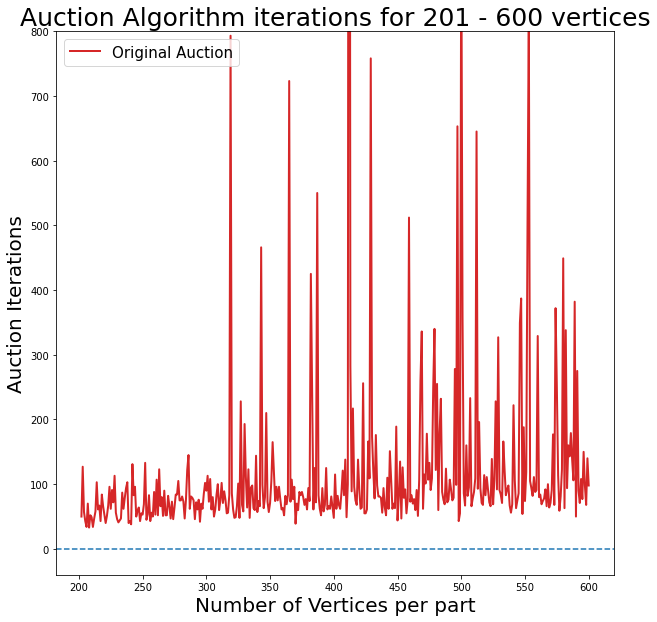

In [348]:
plt.figure(figsize=(10,10))
plt.ylim(-40,800)

plt.plot(x,df['Iterations_orAU'], label='Original Auction', color='tab:red', linewidth=2)
plt.axhline(y=0, linestyle='dashed')

plt.legend(loc=2, prop={'size': 15})

plt.ylabel('Auction Iterations', fontsize=20)
plt.xlabel('Number of Vertices per part', fontsize=20)
plt.title('Auction Algorithm iterations' + title_vertices, fontsize=25)

plt.show()

In [346]:
print('Number of failed execution for MWM: ' + str(len(df[df['Total_Cost_MWM'] == -1])))
print('Number of failed execution for eAU_4: ' + str(len(df[df['Total_Cost_eAU_4'] == -1])))
print('Number of failed execution for eAU_5: ' + str(len(df[df['Total_Cost_eAU_5'] == -1])))
print('Number of failed execution for eAU_6: ' + str(len(df[df['Total_Cost_eAU_6'] == -1])))
print('Number of failed execution for eAU_7: ' + str(len(df[df['Total_Cost_eAU_7'] == -1])))
print('Number of failed execution for eAU_8: ' + str(len(df[df['Total_Cost_eAU_8'] == -1])))
print('Number of failed execution for eAU_9: ' + str(len(df[df['Total_Cost_eAU_9'] == -1])))
print('Number of failed execution for eAU_10: ' + str(len(df[df['Total_Cost_eAU_10'] == -1])))

Number of failed execution for MWM: 0
Number of failed execution for eAU_4: 61
Number of failed execution for eAU_5: 2
Number of failed execution for eAU_6: 6
Number of failed execution for eAU_7: 1
Number of failed execution for eAU_8: 1
Number of failed execution for eAU_9: 0
Number of failed execution for eAU_10: 0


In [347]:
print(df["Auction_Winner"].value_counts(normalize=False))
print('\n')
print(df["Winner_Execution_Time"].value_counts(normalize=False))
print('\n')
print(df["Winner_Total_Cost"].value_counts(normalize=False))

auction_original    399
Name: Auction_Winner, dtype: int64


AU    399
Name: Winner_Execution_Time, dtype: int64


MWM    399
Name: Winner_Total_Cost, dtype: int64
